## MSDS 7331: Data Mining
## Lab 1: Visualization and Data Preprocessing
## 26 May 2019
## Authors: Meredith Ludlow, Anand Rajan, Kristen Rollins, and Tej Tenmattam

---

### Business Understanding

<div class="alert alert-block alert-info">
<b>Rubric 1:</b> Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific.
</div>

The Census Bureau presents census data from the entire United States including Puerto Rico and District of Columbia. The data consists of 5 year estimates from the 2017 American Community Survey. The data contains 37 variables that measure features such as socio-economic status, race, and sex, and is produced for all counties. While we see in reports that the poverty of many counties has decreased over the last 5 years and median income has increased, we want to see how this has affected our nation's economy in terms of unemployment and poverty. An important thing to note in the same report, is that there were counties which had negative growth reported as well. 

As per numbers on poverty index by state, we see anything beyond 19 percent being really poor. Based on the statistics it will be interesting to analyze the child poverty and unemployment features provided in the data. We can use the data to mine and predict future trends also. The available features collected on the data set can be attributed to the two variables chosen for study.

The data for the census was collected to have information on population distribtions for the United States. Our intentions for the data set are to be able to accurately predict unemployment rates and child poverty rates. If we can predict them, then we can see what variables contribute to an accurate prediction. Knowing what factors are associated with unemployment and child poverty can create a basis for what things can be changed to lower unemployment and child poverty. A good prediction algorithm will have a prediction accuracy of at least 90%. Because the data covers the whole United States, it is important to make accurate predictions so that those trying to bring about change can effectively and efficiently utilize resources in places where they are most needed.

### Data Meaning Type

<div class="alert alert-block alert-info">
<b>Rubric 2:</b> Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.
</div>

We selected the 2017 Census data taken from the American Community Survey, located on __[Kaggle](https://www.kaggle.com/muonneutrino/us-census-demographic-data)__. It has data from the entire U.S. and can be used for analysis and providing interesting insights. Full sets of data are found on the American fact finder website.  We will be using the file named acs2017_census_data.csv for our analysis.
The data has 37 variables and 74,001 rows. We will be utilizing all of the data for our analysis. We will be using important attributes that can be used to predict unemployment and child poverty.

Acknowledgement goes to the Census Bureau of the U.S. Since this is a U.S. federal government product, copyrights are not violated if used within the U.S.
The attribute definitions are as follows:

| Attribute | Data Type | Description |
|-----------|-----------|-------------|
| TractID | Nominal | Unique identification number for the census tract <br/> (A tract is a geographic area, comparable to a neighborhood, <br/> defined for the purpose of taking a census.) |
| State | Nominal | U.S. state or territory the tract is located in |
| County | Nominal | County or county-equivalent the tract is located in |
| TotalPop | Integer | Total population of the census area |
| Men | Integer | Number of men living in the census tract |
| Women | Integer | Number of women living in the census tract |
| Hispanic | Decimal | Percentage of population that is Hispanic/Latino |
| White | Decimal | Percentage of population that is white |
| Black | Decimal | Percentage of population that is black |
| Native | Decimal | Percent of population that is Native American |
| Asian | Decimal | Percent of population that is Asian |
| Pacific | Decimal | Percent of population that is Native Hawaiian or other Pacific Islander |
| VotingAgeCitizen | Integer | Number of voting age citizens in the census tract |
| Income | Decimal | Median household income in USD (\$) |
| IncomeErr | Decimal | Median household income error (\$) |
| IncomePerCap | Decimal | Income per capita (\$) |
| IncomePerCapErr | Decimal | Income per capita error (\$) |
| Poverty | Decimal | Percentage of population under the poverty level |
| ChildPoverty | Decimal | Percentage of children under the poverty level |
| Professional | Decimal | Percent employed in management, business, science, and arts |
| Service | Decimal | Percent employed in service jobs |
| Office | Decimal | Percent employed in sales and office jobs |
| Construction | Decimal | Percent employed in natural resources, construction, and maintenance |
| Production | Decimal | Percent employed in production, transportation, and material movement |
| Drive | Decimal | Percent commuting alone in a car, van, or truck |
| Carpool | Decimal | Percent carpooling in a car, van, or truck |
| Transit | Decimal | Percent commuting on public transportation |
| Walk | Decimal | Percent walking to work |
| OtherTransp | Decimal | Percent commuting via other means |
| WorkAtHome | Decimal | Percentage working at home |
| MeanCommute | Decimal | Mean commute time in minutes |
| Employed | Integer | Number of people employed (16+) |
| PrivateWork | Decimal | Percentage employed in private industry |
| PublicWork | Decimal | Percentage employed in public jobs |
| SelfEmployed | Decimal | Percentage self-employed
| FamilyWork | Decimal | Percentage in unpaid family work |
| Unemployed | Decimal | Unemployment rate (%) |

### Data Quality

<div class="alert alert-block alert-info">
<b>Rubric 3:</b> Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods.
</div>

Before jumping into analysis, it is important for us to verify the quality of our data. After importing various libraries and our dataset, we first verified that there were no duplicates by checking the uniqueness of the TractID field. Because this field was stated to be an identifier for each geographic area of the census, we assumed that there would be no duplicates; we confirmed this to be safe. 

We also viewed missing values occuring in each column. Upon investigation, we found that many NaNs were occuring because several tracts had a population of 0, leading to invalid percentages for other variables. These missing values were not mistakes in the data, because it is possible for census tracts to be unpopulated. However, it does not make sense to predict poverty or unemployment rates for empty areas, so we chose to remove these observations. To deal with the remaining missing values, we performed imputation to the median, some aggregated over another variable. We favored the median over the mean because the median is not heavily influenced by outliers.

Finally, to identify potential outliers we looked at summary statistics of our numeric variables. While it is difficult to detect outliers in such a high-dimensional space, in this way we could identify out of the ordinary minimums and maximums, especially with so many percentage attributes. For instance, if a percentage variable had a minimum less than 0 or maximum greater than 100, this would certainly have been an error in the data. We did not observe any mistakes such as this, and we felt that the non-percentage variables had reasonable statistics as well. Therefore we did not remove any outliers. 

In [1]:
# importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
print(os.listdir("Data")) # view our data files

# Set seaborn plot styles
sns.set_style('darkgrid')
sns.set_color_codes('muted')
sns.set_context(rc = {'patch.linewidth': 0.0})

import warnings
warnings.filterwarnings("ignore") # ignore warnings for clean report

# Statistics imports
import scipy, scipy.stats

# df.head() displays all the columns without truncating
pd.set_option('display.max_columns', None)

['acs2015_census_tract_data.csv', 'acs2015_county_data.csv', 'acs2017_census_tract_data.csv', 'acs2017_county_data.csv']


In [2]:
# reading csv file as pandas dataframe
df_17_census = pd.read_csv('Data/acs2017_census_tract_data.csv')

In [3]:
df_17_census['TractId'].is_unique # if data does not have duplicates

True

As the tract IDs are unique, we have no duplicate data.

In [4]:
# Set TractID as index on the records
df_17_census.set_index('TractId', inplace=True)
df_17_census.head() # view first 5 rows of our data

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
TractId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,1.2,0.0,1407,67826.0,14560.0,33018.0,6294.0,10.7,20.8,38.5,15.6,22.8,10.8,12.4,94.2,3.3,0.0,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,1.0,0.0,1652,41287.0,3819.0,18996.0,2453.0,22.4,35.8,30.5,24.9,22.9,6.3,15.4,90.5,9.1,0.0,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,0.7,0.4,2480,46806.0,9496.0,21236.0,2562.0,14.7,21.1,27.9,19.4,33.3,9.9,9.6,88.3,8.4,0.0,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,0.2,0.0,3257,55895.0,4369.0,28068.0,3190.0,2.3,1.7,29.0,16.6,25.8,9.1,19.5,82.3,11.2,0.0,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,3.1,0.0,7229,68143.0,14424.0,36905.0,10706.0,12.2,17.9,48.8,13.8,20.5,3.5,13.4,86.9,11.2,0.0,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [5]:
df_17_census.info() # list all columns and data types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74001 entries, 1001020100 to 72153750602
Data columns (total 36 columns):
State               74001 non-null object
County              74001 non-null object
TotalPop            74001 non-null int64
Men                 74001 non-null int64
Women               74001 non-null int64
Hispanic            73305 non-null float64
White               73305 non-null float64
Black               73305 non-null float64
Native              73305 non-null float64
Asian               73305 non-null float64
Pacific             73305 non-null float64
VotingAgeCitizen    74001 non-null int64
Income              72885 non-null float64
IncomeErr           72885 non-null float64
IncomePerCap        73256 non-null float64
IncomePerCapErr     73256 non-null float64
Poverty             73159 non-null float64
ChildPoverty        72891 non-null float64
Professional        73190 non-null float64
Service             73190 non-null float64
Office              73190 

Here we see that the pandas data types for each attribute match those in our data description table, as the pandas "object" type represents a string. Therefore we do not have to make any type conversions. We do observe that not all attributes have the same number of observations, so we will investigate missing values further.

In [6]:
# View initial summary statistics on data features
df_17_census.describe() 

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,74001.000000,74001.000000,74001.000000,73305.000000,73305.000000,73305.00000,73305.000000,73305.000000,73305.000000,74001.000000,72885.000000,72885.000000,73256.000000,73256.000000,73159.000000,72891.000000,73190.000000,73190.000000,73190.000000,73190.000000,73190.000000,73200.000000,73200.000000,73200.000000,73200.000000,73200.000000,73200.000000,73055.000000,74001.000000,73190.000000,73190.000000,73190.000000,73190.000000,73191.000000
mean,4384.716017,2157.710707,2227.005311,17.265444,61.309043,13.28910,0.734047,4.753691,0.147341,3102.885961,61086.829265,9697.465747,30651.804194,4270.174225,16.118186,21.155872,35.559478,18.874446,23.427724,9.239350,12.899281,75.698005,9.308369,5.395186,3.042825,1.894605,4.661466,26.056594,2049.152052,79.494222,14.163342,6.171484,0.171164,7.246738
std,2228.936729,1120.560504,1146.240218,23.073811,30.634461,21.60118,4.554247,8.999888,1.029250,1542.245024,30516.098180,6154.669518,16126.937143,3148.049041,12.691045,18.645759,15.144984,8.137261,5.806091,6.031393,7.712496,15.292660,5.222494,11.689470,5.805753,2.549374,4.014940,7.124524,1138.865457,8.126383,7.328680,3.932364,0.456580,5.227624
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2692.000000,728.000000,32.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2903.000000,1416.000000,1465.000000,2.600000,38.000000,0.80000,0.000000,0.200000,0.000000,2061.000000,40357.000000,5735.000000,20556.750000,2503.000000,6.900000,6.200000,24.700000,13.300000,19.700000,5.000000,7.100000,72.200000,5.700000,0.000000,0.400000,0.400000,2.000000,21.100000,1276.000000,75.200000,9.300000,3.500000,0.000000,3.900000
50%,4105.000000,2007.000000,2082.000000,7.400000,70.400000,3.80000,0.000000,1.500000,0.000000,2905.000000,54375.000000,8267.000000,27215.500000,3404.000000,12.600000,16.300000,33.300000,17.700000,23.200000,8.300000,11.800000,79.900000,8.500000,1.000000,1.400000,1.200000,3.800000,25.400000,1895.000000,80.600000,13.000000,5.500000,0.000000,6.000000
75%,5506.000000,2707.000000,2803.000000,21.100000,87.700000,14.60000,0.400000,5.000000,0.000000,3906.000000,74659.000000,11913.000000,36408.250000,4968.250000,21.800000,31.600000,44.900000,23.300000,26.900000,12.500000,17.500000,84.900000,11.900000,4.600000,3.300000,2.500000,6.300000,30.300000,2635.000000,85.000000,17.600000,8.000000,0.000000,9.000000
max,65528.000000,32266.000000,33262.000000,100.000000,100.000000,100.00000,100.000000,100.000000,71.900000,39389.000000,249750.000000,153365.000000,220253.000000,134017.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,73.900000,28945.000000,100.000000,100.000000,100.000000,22.300000,100.000000


In [7]:
#Total number of cells
totCells=np.product(df_17_census.shape)

#Total count of missing values by column
misCnt = df_17_census.isnull().sum()

#Total of all missing counts columns
totMisCnt = misCnt.sum()

#Percentage of missing values among total
print("The 2017 census dataset contains " + str(round(((totMisCnt/totCells) * 100), 2)) + "% missing values.")

The 2017 census dataset contains 0.89% missing values.


In [8]:
#Count number of rows containing any missing values
misRows = df_17_census.isnull().any(axis=1).sum()
#Total rows in dataset
totRows = df_17_census.shape[0]
print("The 2017 census dataset contains " + str(round(((misRows/totRows) * 100), 2)) + "% rows with missing values.")

The 2017 census dataset contains 1.73% rows with missing values.


In [9]:
#View rows having any null values
df_17_census[df_17_census.isnull().any(axis=1)].head(10)

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
TractId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1003990000,Alabama,Baldwin County,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1015981901,Alabama,Calhoun County,8,4,4,0.0,100.0,0.0,0.0,0.0,0.0,8,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1015981902,Alabama,Calhoun County,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1015981903,Alabama,Calhoun County,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1097003605,Alabama,Mobile County,757,208,549,2.9,66.4,25.1,0.0,0.5,0.0,732,NaN,NaN,2569.0,369.0,NaN,NaN,23.5,21.2,43.5,4.6,7.3,27.2,13.4,6.1,37.4,1.2,14.6,13.7,260,79.2,11.9,4.2,4.6,16.9
1097990000,Alabama,Mobile County,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1117980000,Alabama,Shelby County,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1125011200,Alabama,Tuscaloosa County,7307,3454,3853,2.1,82.1,10.2,0.3,2.9,0.3,7004,25833.0,5071.0,5632.0,608.0,16.7,NaN,33.6,30.4,33.7,1.0,1.3,42.2,1.8,1.9,22.5,6.5,25.0,12.5,1148,47.0,51.0,2.0,0.0,31.2
2185000300,Alaska,North Slope Borough,2783,2267,516,3.5,80.6,1.0,10.0,2.3,0.2,2750,NaN,NaN,99450.0,10698.0,1.8,NaN,31.2,13.9,10.7,24.9,19.3,9.5,7.9,6.8,74.1,0.4,1.3,6.3,2772,99.7,0.3,0.0,0.0,0.1


By peeking at some rows in our data that have missing values, we see that there are tracts that have a population of 0. This causes all of the percentage attributes to be Not a Number (NaN) for these rows, because dividing by 0 is invalid. It does not make sense to predict poverty or unemployment rates for areas with no one living there. Thus we chose to omit the observations where the total population is 0.

In [10]:
#Drop tracts where population is 0
df_17_cln = df_17_census.drop(df_17_census[df_17_census.TotalPop == 0].index)
print ("-Attribute-        -Null Count-")
df_17_cln.isnull().sum() # view remaining NAs

-Attribute-        -Null Count-


State                 0
County                0
TotalPop              0
Men                   0
Women                 0
Hispanic              0
White                 0
Black                 0
Native                0
Asian                 0
Pacific               0
VotingAgeCitizen      0
Income              420
IncomeErr           420
IncomePerCap         49
IncomePerCapErr      49
Poverty             146
ChildPoverty        414
Professional        115
Service             115
Office              115
Construction        115
Production          115
Drive               105
Carpool             105
Transit             105
Walk                105
OtherTransp         105
WorkAtHome          105
MeanCommute         250
Employed              0
PrivateWork         115
PublicWork          115
SelfEmployed        115
FamilyWork          115
Unemployment        114
dtype: int64

After fixing this issue, we noticed that some tracts still did not have data for unemployment or child poverty rates. Because these are the attributes that we want to predict, it would unfairly aid our predictions if we were to impute these values, whether by imputing to the mean or median or regressing based on some other attribute. Therefore we chose to delete rows having no data for unemployment or child poverty rates.

In [11]:
#Drop tracts where child poverty or unemployment is null
df_17_cln = df_17_cln[np.isfinite(df_17_cln['ChildPoverty'])]
df_17_cln = df_17_cln[np.isfinite(df_17_cln['Unemployment'])]
print ("-Attribute-        -Null Count-")
df_17_cln.isnull().sum() # view remaining NAs

-Attribute-        -Null Count-


State                 0
County                0
TotalPop              0
Men                   0
Women                 0
Hispanic              0
White                 0
Black                 0
Native                0
Asian                 0
Pacific               0
VotingAgeCitizen      0
Income              146
IncomeErr           146
IncomePerCap          9
IncomePerCapErr       9
Poverty               0
ChildPoverty          0
Professional          1
Service               1
Office                1
Construction          1
Production            1
Drive                 2
Carpool               2
Transit               2
Walk                  2
OtherTransp           2
WorkAtHome            2
MeanCommute          69
Employed              0
PrivateWork           1
PublicWork            1
SelfEmployed          1
FamilyWork            1
Unemployment          0
dtype: int64

There are still a few missing values in our dataset that we can now impute. In visualizations in a later section, we found that there is wide variation of median income among the states. Therefore, we chose to impute income and income error values to the median for the observation's respective state. The remaining attributes with missing values we imputed to the overall median for that variable.

In [12]:
#Impute to the median by each state
df_grouped = df_17_cln.groupby('State').transform(lambda x: x.fillna(x.median()))
df_17_cln['Income'] = df_grouped['Income']
df_17_cln['IncomeErr'] = df_grouped['IncomeErr']

#Impute remaining values to the overall median
df_17_cln = df_17_cln.fillna(df_17_cln.median())
print ("-Attribute-        -Null Count-")
df_17_cln.isnull().sum() # view remaining NAs

-Attribute-        -Null Count-


State               0
County              0
TotalPop            0
Men                 0
Women               0
Hispanic            0
White               0
Black               0
Native              0
Asian               0
Pacific             0
VotingAgeCitizen    0
Income              0
IncomeErr           0
IncomePerCap        0
IncomePerCapErr     0
Poverty             0
ChildPoverty        0
Professional        0
Service             0
Office              0
Construction        0
Production          0
Drive               0
Carpool             0
Transit             0
Walk                0
OtherTransp         0
WorkAtHome          0
MeanCommute         0
Employed            0
PrivateWork         0
PublicWork          0
SelfEmployed        0
FamilyWork          0
Unemployment        0
dtype: int64

We have now successfully removed or imputed all missing values in our original dataset.

In [13]:
df_17_cln.describe() # summary stats for numeric variables

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.00000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000
mean,4438.372759,2182.350698,2256.022061,17.290081,61.312817,13.268165,0.729703,4.752853,0.146698,3137.878459,61111.961002,9694.920825,30702.626734,4259.381073,16.067164,21.155081,35.566003,18.855030,23.407072,9.256663,12.915429,75.823635,9.323555,5.387234,2.95396,1.888721,4.623234,26.078983,2078.009535,79.506605,14.151449,6.170819,0.171328,7.235223
std,2192.532931,1101.516460,1126.275010,23.097490,30.635700,21.598962,4.525143,8.992743,1.023074,1514.686755,30492.084659,6135.953813,16059.781976,3019.532445,12.514595,18.643563,15.093914,8.037855,5.653534,5.979854,7.629365,15.062128,5.167761,11.659900,5.39858,2.518341,3.821944,7.101069,1121.667248,8.017414,7.224480,3.846069,0.455440,5.177195
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2692.000000,728.000000,949.000000,308.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,4.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2953.000000,1438.000000,1491.000000,2.600000,38.100000,0.800000,0.000000,0.200000,0.000000,2093.000000,40400.000000,5740.000000,20603.000000,2507.000000,6.900000,6.200000,24.700000,13.300000,19.700000,5.000000,7.100000,72.300000,5.800000,0.000000,0.40000,0.400000,2.000000,21.100000,1302.000000,75.300000,9.300000,3.500000,0.000000,3.900000
50%,4133.000000,2022.000000,2100.000000,7.400000,70.400000,3.800000,0.000000,1.500000,0.000000,2924.000000,54434.000000,8273.000000,27242.000000,3405.000000,12.600000,16.300000,33.300000,17.700000,23.200000,8.400000,11.800000,79.900000,8.500000,1.000000,1.40000,1.200000,3.800000,25.400000,1913.000000,80.600000,13.000000,5.500000,0.000000,6.000000
75%,5530.000000,2717.000000,2815.000000,21.100000,87.700000,14.500000,0.400000,5.000000,0.000000,3920.000000,74673.000000,11899.000000,36429.000000,4965.000000,21.800000,31.600000,44.900000,23.300000,26.900000,12.500000,17.500000,84.900000,11.900000,4.600000,3.30000,2.500000,6.300000,30.300000,2649.000000,85.000000,17.600000,8.000000,0.000000,9.000000
max,65528.000000,32266.000000,33262.000000,100.000000,100.000000,100.000000,100.000000,91.400000,71.900000,39389.000000,249750.000000,153365.000000,220253.000000,84414.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,73.900000,28945.000000,100.000000,100.000000,100.000000,22.300000,100.000000


After having dealt with missing values, we can investigate our dataset for outliers. While the nominal attributes cannot have outliers, from the summary statistics table above we can identify potential outliers in the numeric variables. For all the attributes that are percentages (Hispanic, White, Black, etc.), there are none that have a minimum less than 0 or a maximum greater than 100. So we did not detect any errors there. For the non-percentage attributes (TotalPop, Men, Women, VotingAgeCitizen, etc.), we were satisfied overall with the distributions of values. There were some columns with rather large maximum values (e.g. Income), but we expect such a variable to have a very skewed distribution. We felt it was appropriate to retain all observations now, as we can account for skewness later on by performing transformations in our predictive models.

In [14]:
#Dimensions of our cleaned dataset
print("Shape of cleaned dataset:", df_17_cln.shape)
print("Observations removed:", df_17_census.shape[0]-df_17_cln.shape[0])

Shape of cleaned dataset: (72889, 36)
Observations removed: 1112


### Simple Statistics

<div class="alert alert-block alert-info">
<b>Rubric 4:</b> Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful.
</div>

Below we have summary statistics for the numeric variables of our cleaned dataset. This includes all but two attributes, which are State and County. At this point we will restrict our simple statistics to the numeric variables, since so many are available.

In [15]:
df_17_cln.describe() # summary stats for numeric variables

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.00000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000
mean,4438.372759,2182.350698,2256.022061,17.290081,61.312817,13.268165,0.729703,4.752853,0.146698,3137.878459,61111.961002,9694.920825,30702.626734,4259.381073,16.067164,21.155081,35.566003,18.855030,23.407072,9.256663,12.915429,75.823635,9.323555,5.387234,2.95396,1.888721,4.623234,26.078983,2078.009535,79.506605,14.151449,6.170819,0.171328,7.235223
std,2192.532931,1101.516460,1126.275010,23.097490,30.635700,21.598962,4.525143,8.992743,1.023074,1514.686755,30492.084659,6135.953813,16059.781976,3019.532445,12.514595,18.643563,15.093914,8.037855,5.653534,5.979854,7.629365,15.062128,5.167761,11.659900,5.39858,2.518341,3.821944,7.101069,1121.667248,8.017414,7.224480,3.846069,0.455440,5.177195
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2692.000000,728.000000,949.000000,308.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,4.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2953.000000,1438.000000,1491.000000,2.600000,38.100000,0.800000,0.000000,0.200000,0.000000,2093.000000,40400.000000,5740.000000,20603.000000,2507.000000,6.900000,6.200000,24.700000,13.300000,19.700000,5.000000,7.100000,72.300000,5.800000,0.000000,0.40000,0.400000,2.000000,21.100000,1302.000000,75.300000,9.300000,3.500000,0.000000,3.900000
50%,4133.000000,2022.000000,2100.000000,7.400000,70.400000,3.800000,0.000000,1.500000,0.000000,2924.000000,54434.000000,8273.000000,27242.000000,3405.000000,12.600000,16.300000,33.300000,17.700000,23.200000,8.400000,11.800000,79.900000,8.500000,1.000000,1.40000,1.200000,3.800000,25.400000,1913.000000,80.600000,13.000000,5.500000,0.000000,6.000000
75%,5530.000000,2717.000000,2815.000000,21.100000,87.700000,14.500000,0.400000,5.000000,0.000000,3920.000000,74673.000000,11899.000000,36429.000000,4965.000000,21.800000,31.600000,44.900000,23.300000,26.900000,12.500000,17.500000,84.900000,11.900000,4.600000,3.30000,2.500000,6.300000,30.300000,2649.000000,85.000000,17.600000,8.000000,0.000000,9.000000
max,65528.000000,32266.000000,33262.000000,100.000000,100.000000,100.000000,100.000000,91.400000,71.900000,39389.000000,249750.000000,153365.000000,220253.000000,84414.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,73.900000,28945.000000,100.000000,100.000000,100.000000,22.300000,100.000000


From the median values in the table, we observe that the typical census tract in the U.S. has about 4,100 people with slightly more women than men, has a white majority, and a median income of \$54k. The typical tract also has a childhood poverty rate of 16.3\% and an unemployment rate of 6\%. 

While the summary table above is very descriptive, it is also helpful to visualize some attribute distributions with histograms and boxplots in comparison to the values seen. From the histogram below, we see that there are many tracts with low black and hispanic populations, seen by their pronounced right-skew. In contrast, there are consistently more tracts having high white populations. This is reflected in the summary table, where we see that the median for white populations is 87.7\% while the mean is pulled down to 61.3\% by the distribution. We expect that these racial breakdowns will influence our predictions on child poverty and unemployment.

#### Histogram of Race Percentages

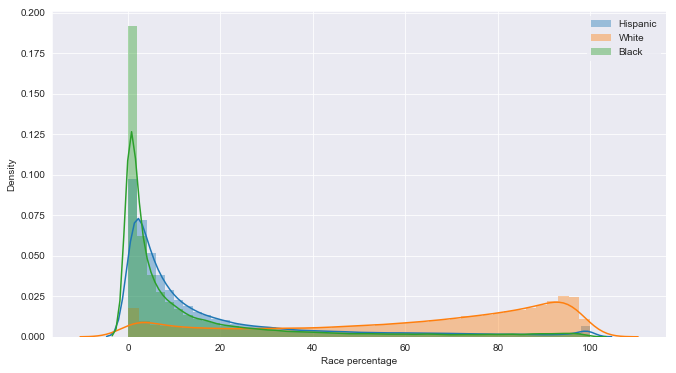

In [16]:
# Overlayed histograms of 3 most populous races
fig, ax = plt.subplots()
fig.set_size_inches(11, 6)
sns.distplot(df_17_cln["Hispanic"], label="Hispanic", ax=ax)
sns.distplot(df_17_cln["White"], label="White", ax=ax)
sns.distplot(df_17_cln["Black"], label="Black", ax=ax)
plt.legend()
plt.xlabel('Race percentage');
plt.ylabel('Density');

We can also examine statistics for the Income variable.

#### Income Distribution

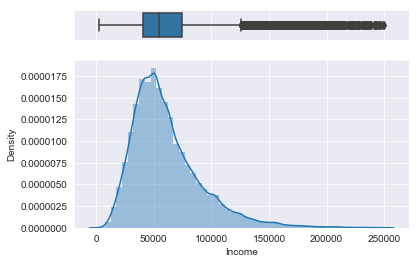

In [17]:
# Histogram and boxplot for income
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df_17_cln['Income'], ax=ax_box)
plt.ylabel('Density')
sns.distplot(df_17_cln['Income'], ax=ax_hist)
ax_box.set(xlabel='');

In [17]:
#Mean and median household income
census_tract_mean = df_17_cln['Income'].mean()
census_tract_median = df_17_cln['Income'].median()
print('From the 2017 Census Tract data, the mean household income is $'+ str(round(census_tract_mean,2)) + ', and the median household income is $' +
      str(census_tract_median))

From the 2017 Census Tract data, the mean household income is $61111.96, and the median household income is $54434.0


These mean and median income values are reflected in the income histogram, which is skewed to the right. Thus the mean is greater than the median. Because we expect poverty and unemployment rates to be inversely related to income levels, it is useful to know the shape and statistics of the income distribution.

Most of our attributes are recorded as percentages, which makes it convenient to compare variables on the same scale. Below we depict statistics for poverty, childhood poverty, and unemployment rates. We observe that all of the distributions are right-skewed, but child poverty rates tend to be the highest out of these attributes. This is seen by the higher median and Q3 values for child poverty compared to both poverty and unemployment. While we did not anticipate it before, we believe this makes sense because there may often be multiple children living in a single house that is under the poverty level. In addition, unemployment rates are clustered at lower percentages, implying that there are many people that are employed but still in poverty.

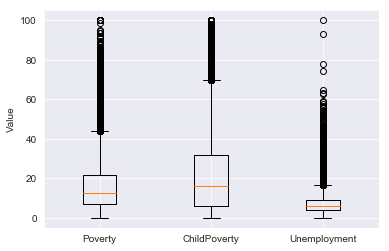

In [19]:
#Box plot on poverty, child poverty and unemployment features.

vars = [df_17_cln['Poverty'], df_17_cln['ChildPoverty'], df_17_cln['Unemployment']]
plt.boxplot(vars, labels=['Poverty','ChildPoverty','Unemployment'])
plt.ylabel('Value');

According to the Bureau of Labor Statistics, the national unemployment rate at the end of 2017 was 4.1\%. This is lower than both the mean and median percentages for Unemployment that we see below. However, this may be reconciled because the mean and median do not account for the total populations of each tract. There may be many tracts with low populations but high unemployment rates that influence the distribution. We can take a weighted average of the tracts to get the overall unemployment rate for the dataset and find out for ourselves.

In [20]:
print("The Unemployment mean percentage is", str(round(df_17_cln['Unemployment'].mean(),2)))
print("The Unemployment median percentage is", df_17_cln['Unemployment'].median())

The Unemployment mean percentage is 7.24
The Unemployment median percentage is 6.0


In [20]:
#Finding overall unemployment rate
df_UnempCount = df_17_cln['Unemployment']/100*df_17_cln['TotalPop']
print("The overall Unemployment rate is", round(df_UnempCount.sum()/df_17_cln['TotalPop'].sum()*100,2))

The overall Unemployment rate is 6.89


We found the overall unemployment rate for our dataset to be 6.89\%, which is still higher than the reported value of 4.1\%. Perhaps this is due to our dataset including Puerto Rico, or perhaps the reported value was underestimated or our dataset values are exaggerated. We did not investigate this further due to time constraints. For the purposes of these simple statistics, as a compromise we considered the median of 6\% to be a reasonable cutoff between high and low unemployment rates.

With this in mind, we can get a few simple cross-field statistics.

In [21]:
# percentage of tracts with high unemployment rates
percentHighUnemp = len(df_17_cln[df_17_cln.Unemployment >= 6])/len(df_17_cln) * 100
print(percentHighUnemp)

50.376600035670684


Here we see that about 50\% of census tracts have an unemployment rate at or above 6\%, which confirms the median calculation found in the describe() table. That is, half of the census tracts in America have a "high" unemployment rate.

In [22]:
# percentage of high income tracts with high unemployment
# code modified from student lab example provided
df_change = df_17_cln[df_17_cln.Income >= 54434]
changeLen = len(df_change)
df_change = df_change[df_17_cln.Unemployment >= 6]
percentBoth = float(len(df_change))/float(changeLen) * 100
print(percentBoth)

31.52695843051173


Here we have calculated the percentage of high income tracts that have high unemployment rates. This confirms our intuition that tracts having above average median incomes have a much lower unemployment rate (32\% vs 50\%). 

In [23]:
# percentage of high white tracts with high unemployment
# code modified from student lab example provided
df_change = df_17_cln[df_17_cln.White >= 70.4]
changeLen = len(df_change)
df_change = df_change[df_17_cln.Unemployment >= 6]
percentBoth = float(len(df_change))/float(changeLen) * 100
print(percentBoth)

35.767882572023225


In [24]:
# percentage of high black tracts with high unemployment
# code modified from student lab example provided
df_change = df_17_cln[df_17_cln.Black >= 3.8]
changeLen = len(df_change)
df_change = df_change[df_17_cln.Unemployment >= 6]
percentBoth = float(len(df_change))/float(changeLen) * 100
print(percentBoth)

60.57088227260311


Here we have the high unemployment rate for tracts with a greater than average white population, compared to tracts with a greater than average black population. We see that among tracts with a large white population, there are fewer tracts having high unemployment (36\% vs 50\%), while larger black populations are associated with more tracts with high unemployment rates (61\% vs 50\%).  These simple statistics begin to point towards racial disparities, which we will continue to explore in the upcoming sections.

### Visualize Attributes

<div class="alert alert-block alert-info">
<b>Rubric 5:</b> Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate.
</div>

This section will be focused on visualizing individual attributes from our data. We take a look at income, income per capita, gender, race, and population grouped by state.

#### Income and Income Per Capita by State

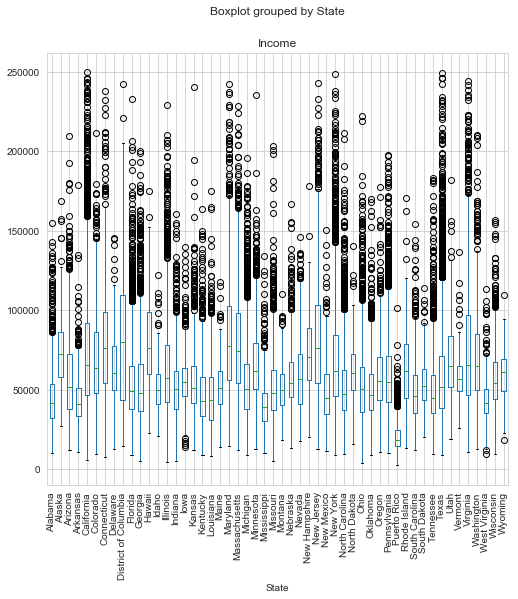

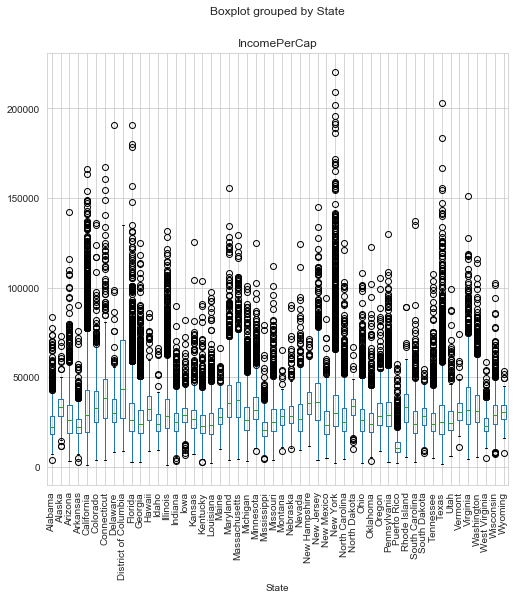

In [25]:
#Boxplots for income and income per capita grouped by state
sns.set_style("whitegrid")
df_17_cln.boxplot(column="Income",  # Column to plot
                 by= "State",         # Column to split upon
                 figsize= (8,8))        # Figure size
plt.xticks(rotation=90);
df_17_cln.boxplot(column="IncomePerCap",  # Column to plot
                 by= "State",         # Column to split upon
                 figsize= (8,8))        # Figure size
plt.xticks(rotation=90);


These boxplots indicate that both income and income per capita are very heavily skewed to the right. The state/territory with the lowest median income and income per capita by far is Puerto Rico. The state with the highest median income and income per capita is the District of Columbia. DC also has very few outliers in both graphs. The states with the highest maximum median housesold incomes are California, Texas, and New York, which are some of the most populated states. 

These two attributes related to income are rather similar and we drew similar conclusions from these visualizations, but we were curious as to any differences between them. Side-by-side boxplots are appropriate for visualizing both income and income per capita because they are numeric fields. In addition, boxplots allow us to group the attributes by state without having to aggregate the values by summing or taking the mean or median, as we would in a barplot, for example. Such aggregation would not be appropriate as it would not account for populations of the states.

#### Percent of Men and Women by State

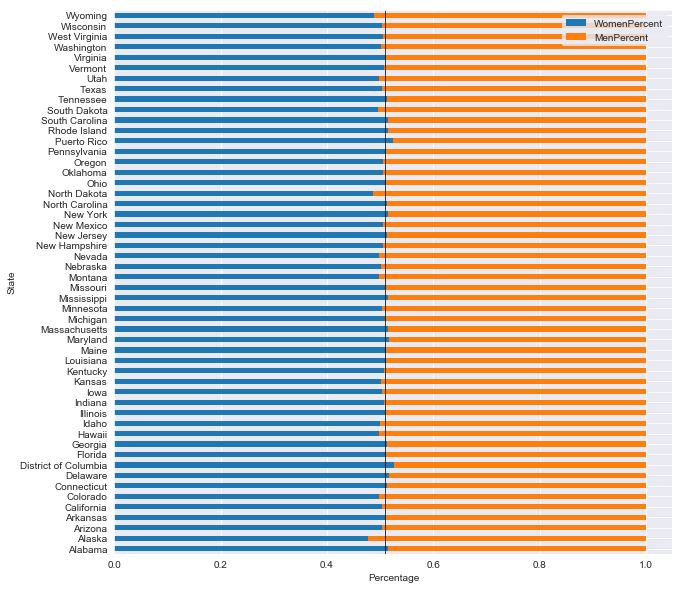

In [26]:
# Bar chart of the percentage of men and women in each state. Summed the data by state and then calculated
# percentages of men and women by state.
sns.set_style("darkgrid")
df_sum = df_17_cln.groupby(by=df_17_cln.State).sum()
df_sum.head()
df_sum['WomenPercent'] = df_sum['Women']/df_sum['TotalPop']
df_sum['MenPercent'] = df_sum['Men']/df_sum['TotalPop']
df_GenderPerc = df_sum.loc[: ,['WomenPercent', 'MenPercent']]
df_GenderPerc.plot(figsize= (10,10), kind='barh', stacked=True)
plt.axvline(x=0.51, linewidth=0.75, color='black')
plt.xlabel('Percentage');

According to Statista.com there were 159.41 million men and 165.92 Million women in the United States in 2017. This leads to the population of the United States in 2017 being approximately 51% female. The graph above shows the percentage of men and women in each state. The vertical black line shows country-wide perentage of females at 51%. The states with the smallest percentage of women are Alaska, North Dakota, and Wyoming. Interestingly, all three of these states are in the bottom 5 in regards to population. Only about 13 states have female percentages that are visibly above the 51% line. This implies that those states have on average higher populations than the states whose female percentages are below the 51% line.

A stacked barplot is appropriate for this data because we have two numeric values (men and women percentage) for each state. Especially since the values add up to 100%, the barplot allows us to visually compare any differences in percentages easily. 

#### Racial Distribution by State

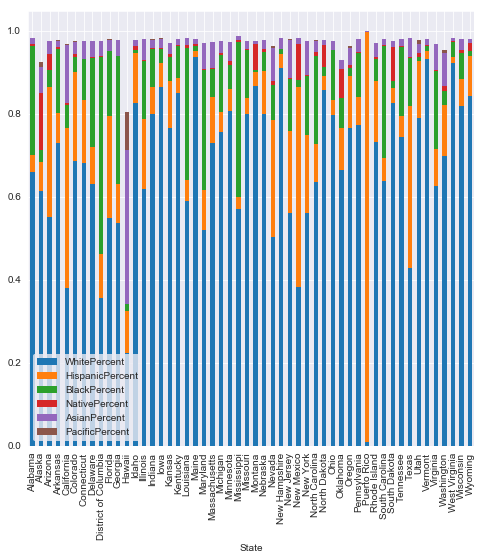

In [27]:
#Graph to compare race by percent composition in each state. Converted percents into counts for each
#tract, summed counts by state, and then found percent of each race by state.
df_17_race=df_17_cln[['TotalPop','State','White','Black','Hispanic','Asian','Native','Pacific']]
race=['White','Black','Hispanic','Asian','Native','Pacific']
df_17_race[race]/=100
df_17_race['WhiteCount']=df_17_race['White']*df_17_race['TotalPop']
df_17_race['BlackCount']=df_17_race['Black']*df_17_race['TotalPop']
df_17_race['NativeCount']=df_17_race['Native']*df_17_race['TotalPop']
df_17_race['HispanicCount']=df_17_race['Hispanic']*df_17_race['TotalPop']
df_17_race['AsianCount']=df_17_race['Asian']*df_17_race['TotalPop']
df_17_race['PacificCount']=df_17_race['Pacific']*df_17_race['TotalPop']
df_sum2 = df_17_race.groupby(by=df_17_race.State).sum()
df_sum2['WhitePercent'] = df_sum2['WhiteCount']/df_sum2['TotalPop']
df_sum2['BlackPercent'] = df_sum2['BlackCount']/df_sum2['TotalPop']
df_sum2['NativePercent'] = df_sum2['NativeCount']/df_sum2['TotalPop']
df_sum2['HispanicPercent'] = df_sum2['HispanicCount']/df_sum2['TotalPop']
df_sum2['AsianPercent'] = df_sum2['AsianCount']/df_sum2['TotalPop']
df_sum2['PacificPercent'] = df_sum2['PacificCount']/df_sum2['TotalPop']
df_racePerc = df_sum2.loc[: ,['WhitePercent', 'HispanicPercent','BlackPercent', 'NativePercent','AsianPercent','PacificPercent']]
df_racePerc.plot(kind='bar', stacked=True, figsize=(8,8));

This graph shows the racial distribution of each state. The most notable thing about the graph is almost all of the states dont add up to 100%. This implies that there are some other racial categories that people identify as that the census doesn't measure. White people take up the majority in all but 6 or 7 states. The next highest racial groups are black and Hispanic. All of the states that border Mexico have the largest population of hispanic people besides Puerto Rico, which is almost 100% hispanic. The largest percentage of black people is in the District of Columbia. Hawaii has the largest population of Asians and Pacific Islanders.

A stacked barplot is appropriate to visualize racial distributions because the few categories can easily be distinguished and compared with a few colors. Since the bars are stacked, the height differences allow us to visualize how much of each state's population is not accounted for.

#### Total Population by State

In [28]:
#Get Total Population by State
df_pop_state = df_17_cln[["State", "TotalPop"]].groupby('State')["TotalPop"].sum()
df_pop_state.head()

State
Alabama        4842699
Alaska          735782
Arizona        6713931
Arkansas       2977897
California    38833329
Name: TotalPop, dtype: int64

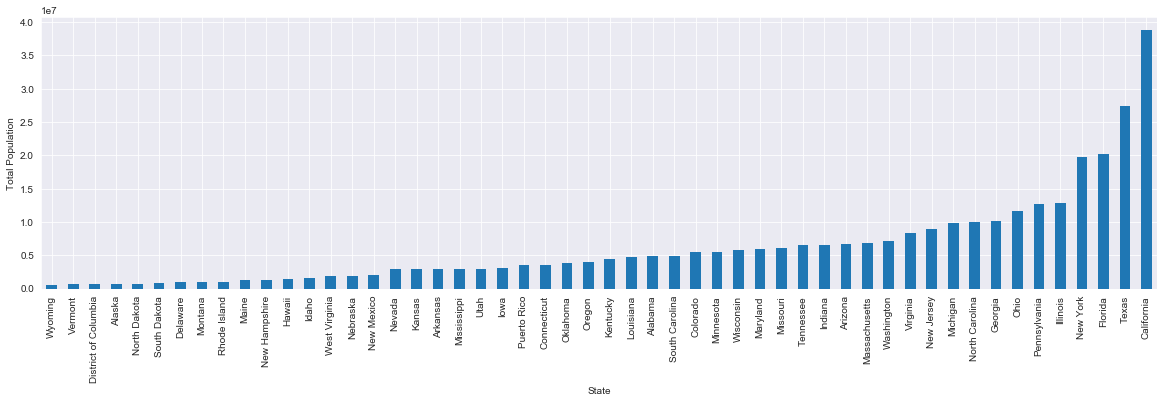

In [29]:
# Sorted, vertical bar
df_pop_state.sort_values().plot(kind="bar", x="State", y="TotalPop", figsize=(20, 5))
plt.ylabel('Total Population');

The states with the highest population are California, Texas, and Florida. The lowest are Wyoming and Vermont.

A barchart is appropriate for the numeric variable of population, since we have a single value to visualize and compare for each state. Sorting the bars by value improves the graph as well, because we can easily compare differences in state populations.

### Explore Joint Attributes

<div class="alert alert-block alert-info">
<b>Rubric 6:</b> Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.
</div>

Next we will focus on exploring the relationships between different attributes. To start, we created a correlation plot with all of the continuous attributes, other than the target variables of child poverty and unemployment.

#### Correlation Plot for Continuous Attributes

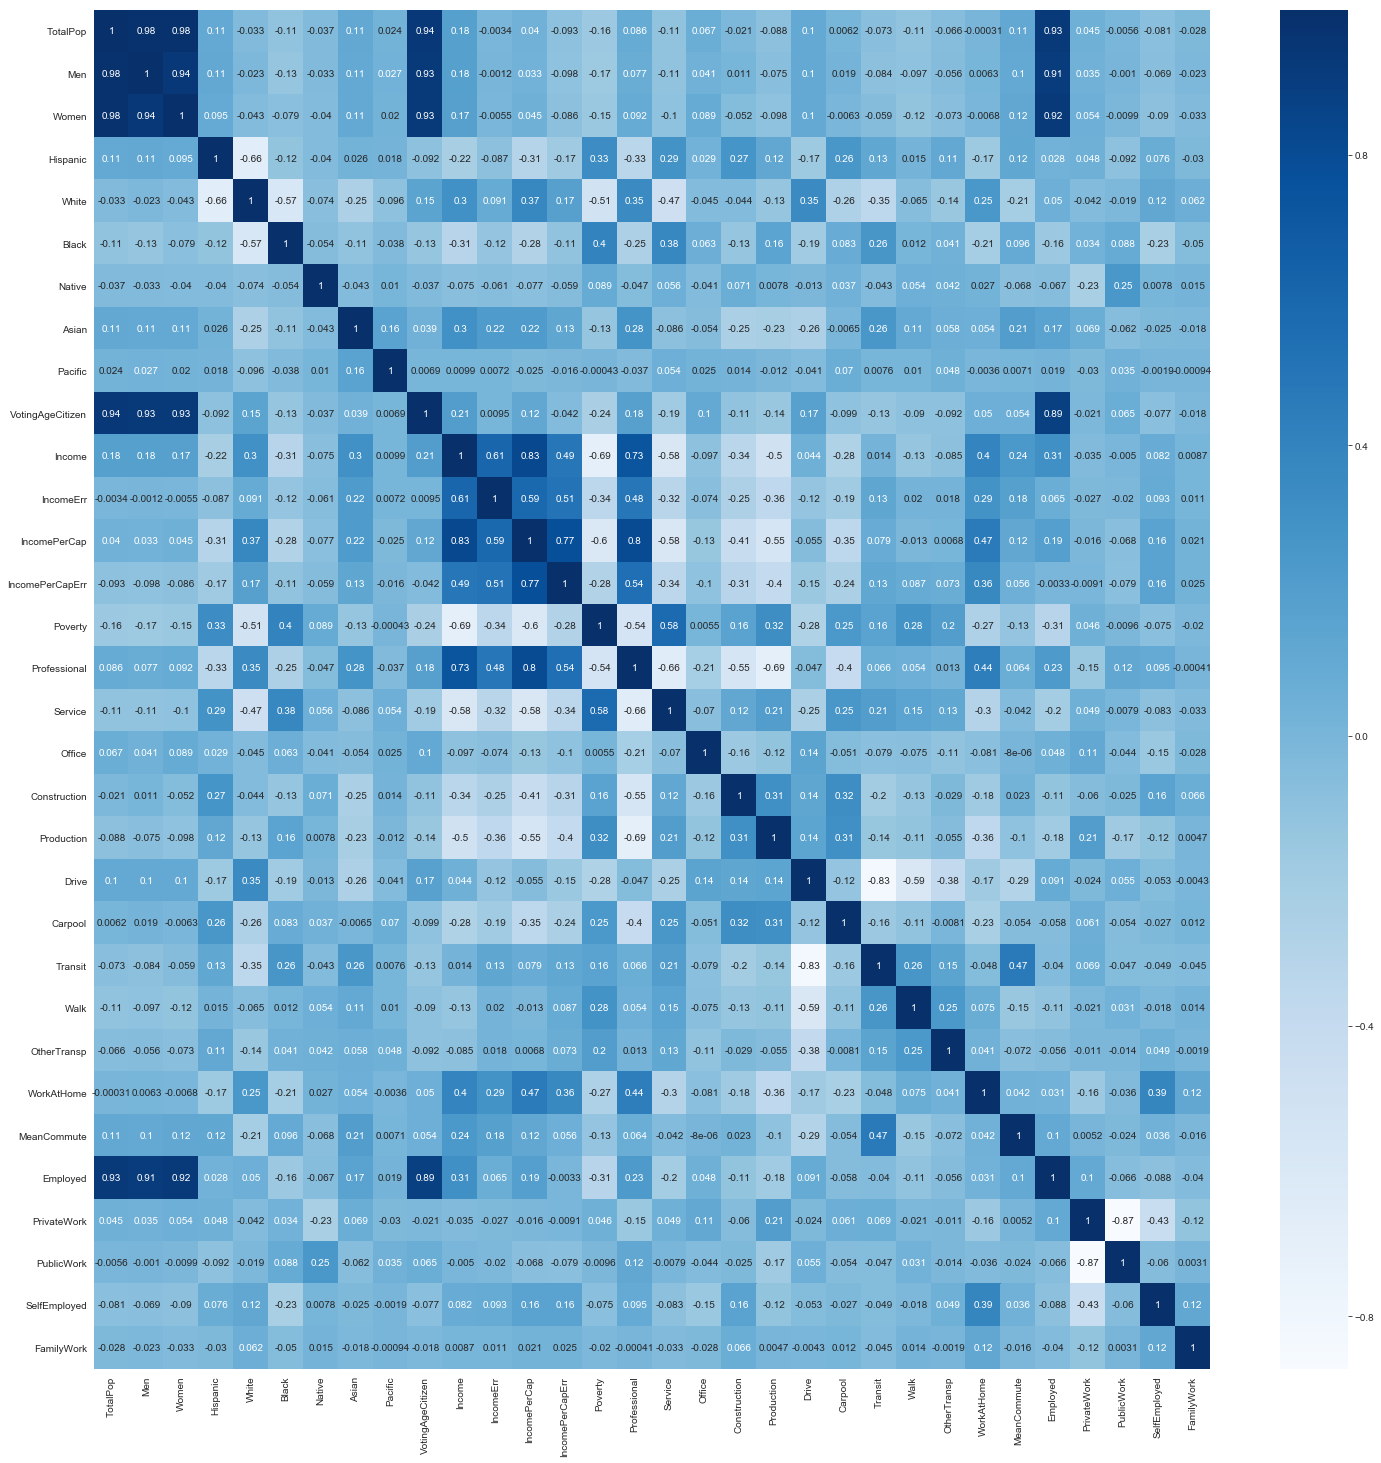

In [30]:
# Correlation plot for all the attributes. We can use to see if any of the attributes can be removed
# because they provide similar info.
df_attributes = df_17_cln.drop(['State', 'County', 'ChildPoverty', 'Unemployment'], axis=1)
f, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(df_attributes.corr(), cmap="Blues", annot=True);

This plot shows the correlations between all continuous predictor variables. Total population is very positivly correlated with the number of men, women, voting age people, and employed people. This makes sense because the percentages of men, women, voting age people, and employed people are all relativily similar across the United States. The variables correlated with total population are also highly correlated with each other. Income per capita is also highly positivly correlated with income because if the median household income is high the average income per person will be as well. 

Public work and private work are highly negatively correlated. This implies that either someone works in the private sector or they work in the public sector. Considering that most people only have one job, this makes sense. Lastly, driving and public transit are higly negatively correlated as well. It could be concluded that someone would either take public transit or drive, but not usually do both. We can use the heat map above as an indication of which variables may not be necessary to use as predictors because they repeat information given by another variable.

#### Correlation of Income to Poverty

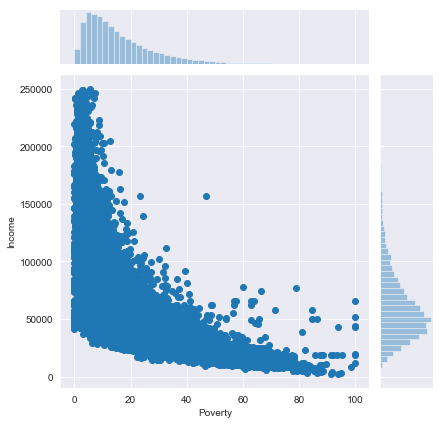

In [33]:
#Joint plot on poverty and Income correlation
sns.set_context(rc = {'patch.linewidth': 1})
sns.jointplot(x='Poverty', y='Income', data=df_17_cln);

The scatterplot above depicts the relationship between poverty and income. From this we see that poverty and income are inversely related. We expected this to be the case, because as the median income of a census tract increases, the poverty rate will decrease. Besides this we see that the income and poverty go hand in hand at the lower quadrant.

#### Correlation of Unemployment to Poverty (linear regression with marginal distributions)

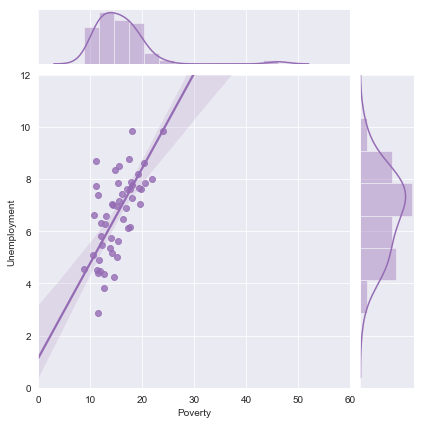

In [34]:
#Correlation join plot for unemployment and poverty 
df_jp = pd.pivot_table(df_17_cln, values=["Unemployment","Poverty"], index="State", aggfunc=np.mean)
g = sns.jointplot(data=df_jp, kind="reg", xlim=(0,60), ylim=(0,12), color = "m",height = 6,
                  y='Unemployment', x='Poverty')

In the scatterplot above the correlation between Unemployment and Poverty is seen for each state. The two variables are quite normal in terms of distribution as seen in the histogram on the x and y axes. We see that state-wise poverty and unemployment levels have a positive, moderately strong linear relationship. This is intuitive because as more people become unemployed, more will fall into poverty. The slope of the line is interesting, however, because it is not a one-to-one relationship (note the x and y scales). Unemployment increases at a higher rate than poverty, implying that there are many people who are under the poverty level while actually being employed.

#### Poverty by State

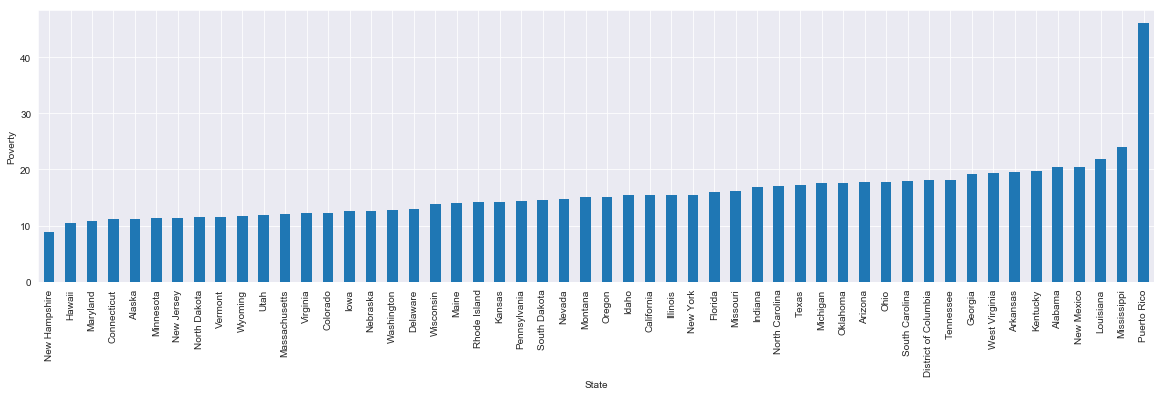

In [35]:
#Bar plot on level of poverty by state
sns.set_context(rc = {'patch.linewidth': 0})
df_corr_income_poverty = pd.pivot_table(df_17_cln, values=["Income","Poverty"], index="State", aggfunc=np.mean)
df_corr_income_poverty["Poverty"].sort_values().plot(kind="bar", y="Poverty", x=df_corr_income_poverty.index, figsize=(20,5))
plt.ylabel('Poverty');

The bar plot above depicts the levels of poverty by state. From this we see that the states with the highest poverty are Puerto Rico, Mississipi, Louisiana, New Mexico and Alabama. However, besides Puerto Rico, the levels of poverty are not all that different across the states, as we only see a slight steady incline from the lowest to highest poverty rate. Thus we are unsure whether state will be a reliable predictor for child poverty or unemployment rates.

#### Child Poverty by State's Total population:

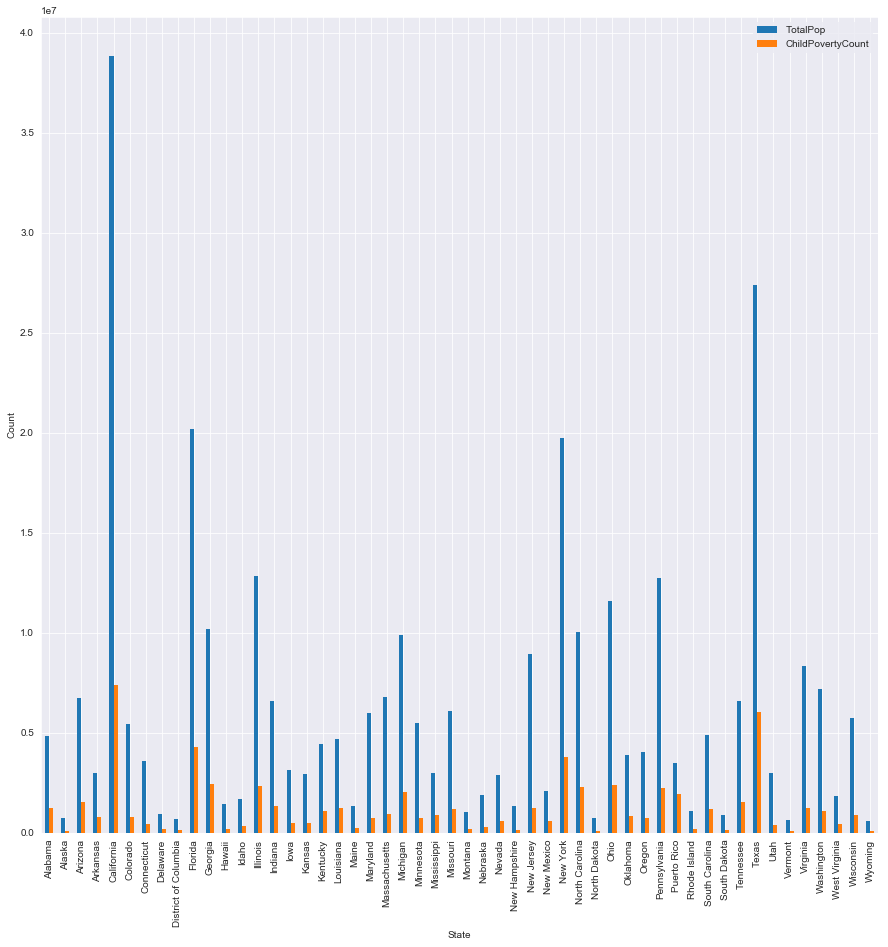

In [36]:
# Calculate the number of children in poverty by multiplying the percent of child poverty by the total population
# then sum the total children in poverty by state.
df_17_cpov=df_17_cln[['TotalPop','State','ChildPoverty']]
df_17_cpov['ChildPoverty']/=100
df_17_cpov['ChildPovertyCount']=df_17_cpov['ChildPoverty']*df_17_cpov['TotalPop']
df_sum4 = df_17_cpov.groupby(by=df_17_cpov.State).sum()
df_sum4.head()
df_cpov = df_sum4[['TotalPop','ChildPovertyCount']]
df_cpov.plot(kind='bar', stacked=False, figsize=(15,15))
plt.ylabel('Count');

This graph shows the number of children in poverty compared to the total population for each state. It would have been best to represent child poverties as percentages of children in the whole state in poverty, however the data doesn't give the total number of children just the total population, so the percentage by state couldn't be calculated. Puerto Rico is noticable for the number of children in poverty compared to its total population. It's more than half. This implies that more than half of Puerto Rico's population is children and a large majority of them are in poverty. Seeing the income distribution of Puerto Rico compared to the rest of the United States from the boxplots of income, it's not out of the question that almost all of the children in Puerto Rico are in poverty. California has the highest number of children in poverty, but it also has the highest population.

### Explore Attributes and Class

<div class="alert alert-block alert-info">
<b>Rubric 7:</b> Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).
</div>

Our ultimate goal is to predict child poverty and unemployment rates for this dataset. To allow us to make these predictions in either a regression or a classification setting, we first created a feature that split the target variable of unemployment into discrete, ordinal categories. The cutoffs were created using the quartiles of the distribution, so that the resulting categories are roughly equal in size.

low          18665
med          18321
very_high    18157
high         17746
Name: UnempCat, dtype: int64


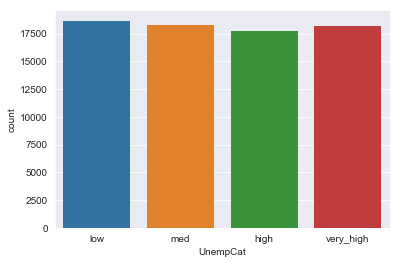

In [37]:
#Categorizing the unemployed percentages in range
#Makes cutoffs using quartiles of clean dataset, so they are roughly equal
df_17_cln['UnempCat'] = pd.cut(df_17_cln.Unemployment,[-1,3.9,6,9,101],labels=['low','med','high','very_high'])
print(df_17_cln.UnempCat.value_counts())

#Show histogram of the categories
sns.countplot(x = 'UnempCat', data = df_17_cln)
plt.show()

In [38]:
df_17_cln.groupby(by='UnempCat').median()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
UnempCat,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
low,4193.0,2056.0,2122.0,5.2,82.3,2.0,0.0,1.9,0.0,3059.0,69310.0,9556.0,34755.0,4124.0,7.5,7.7,41.9,14.3,22.8,7.1,9.1,81.3,7.4,0.6,1.2,1.0,4.9,24.4,2134.0,80.5,12.7,5.8,0.0,2.8
med,4365.0,2140.0,2211.0,6.8,76.5,2.7,0.0,1.9,0.0,3132.0,61971.0,8927.0,30613.0,3681.0,9.8,11.6,36.9,16.2,23.2,8.1,10.7,81.0,8.1,0.8,1.2,1.1,4.2,25.7,2133.0,80.5,12.9,5.7,0.0,5.0
high,4229.0,2072.5,2146.0,9.1,67.7,4.3,0.0,1.5,0.0,2965.0,52182.0,8126.0,26007.0,3291.0,13.9,18.4,31.6,18.6,23.4,9.1,12.6,80.1,9.0,1.0,1.3,1.2,3.5,25.9,1947.0,80.5,13.0,5.5,0.0,7.3
very_high,3720.0,1797.0,1909.0,11.3,34.5,13.1,0.0,0.7,0.0,2514.0,36852.0,6752.0,18848.0,2751.0,25.3,35.4,24.5,23.2,23.7,9.2,15.0,76.3,10.1,2.1,1.9,1.4,2.7,25.5,1444.0,80.7,13.3,4.9,0.0,12.3


In the table above, median values are shown for the numeric variables after being grouped by the four unemployment categories. This allows us to see trends in the data at a more granular level. One trend that we observe is that as the unemployment category increases, the Hispanic and black populations are increasing, while the white and Asian populations are increasing. Another phenomenon is that while unemployment increases, there are actually more people in service, construction, and production jobs than there are at lower unemployment levels. Conversely, as the unemployment category increases, the percentage of people in "professional" jobs decreases sharply. This may indicate that in census tracts with high unemployment, most of the jobs that are available are lower-skilled, but there are not enough available to combat unemployment.

This categorical breakdown of unemployment will be useful as we move to predictive modeling. But we now return to the continuous scale of unemployment to continue exploring relationships between features and the target variables.

#### Relationships between Unemployment and Race

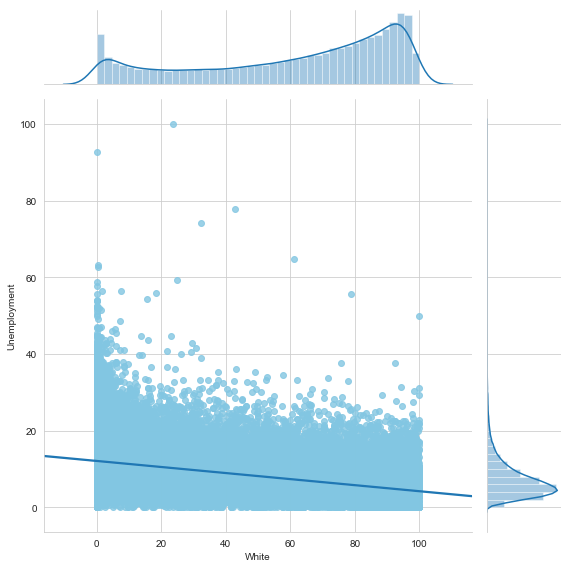

In [39]:
sns.set_style("whitegrid")
sns.set_context(rc = {'patch.linewidth': 1})
sns.jointplot(x='White', y='Unemployment', data=df_17_cln, kind='reg',scatter_kws={'color':'c'}, size=8);

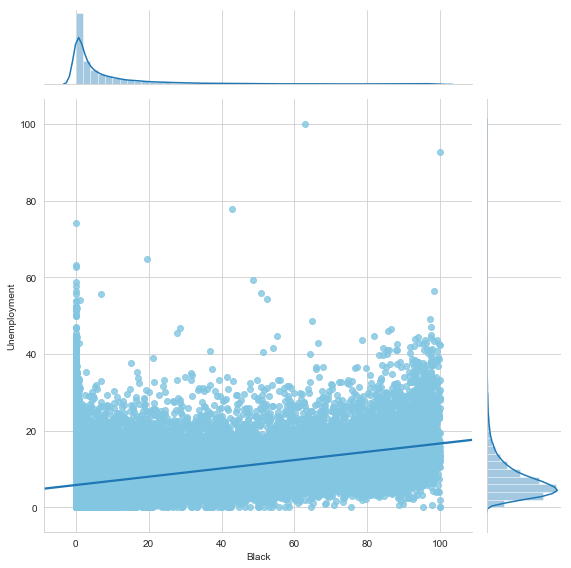

In [40]:
sns.jointplot(x='Black', y='Unemployment', data=df_17_cln, kind='reg', scatter_kws={'color':'c'}, size=8);

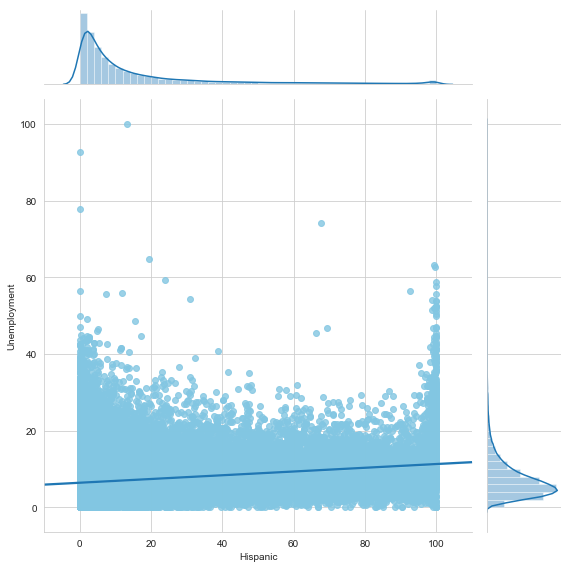

In [41]:
sns.jointplot(x='Hispanic', y='Unemployment', data=df_17_cln, kind='reg', scatter_kws={'color':'c'}, size=8);

As can be seen from the above three scatterplots, the Unemployment rate and the ethnic/racial group percentage shows a strong correlation. While the points are rather dense, there are clear patterns in the data indicating that the unemployment rate is correlated either in a positive or negative direction depending on the ethnic/racial breakdown of a particular community. In particular, as the white population increases, the unemployment rate decreases. Conversely, as the black and Hispanic populations increase, unemployment increases. Notably, unemployment increases at a faster rate for black populations when compared to Hispanic populations.

#### Relationships between Child Poverty and Race:

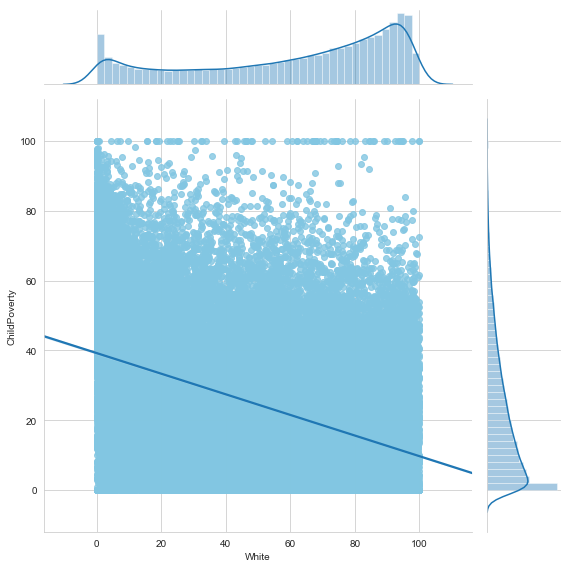

In [42]:
sns.jointplot(x='White', y='ChildPoverty', data=df_17_cln, kind='reg', scatter_kws={'color':'c'}, size=8);

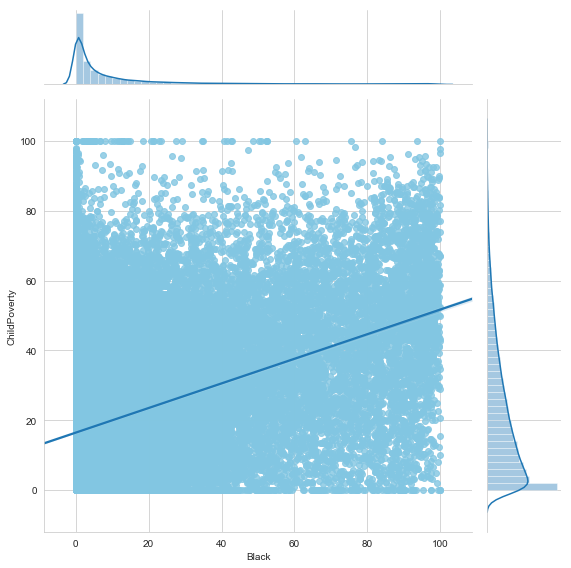

In [43]:
sns.jointplot(x='Black', y='ChildPoverty', data=df_17_cln, kind='reg', scatter_kws={'color':'c'}, size=8);

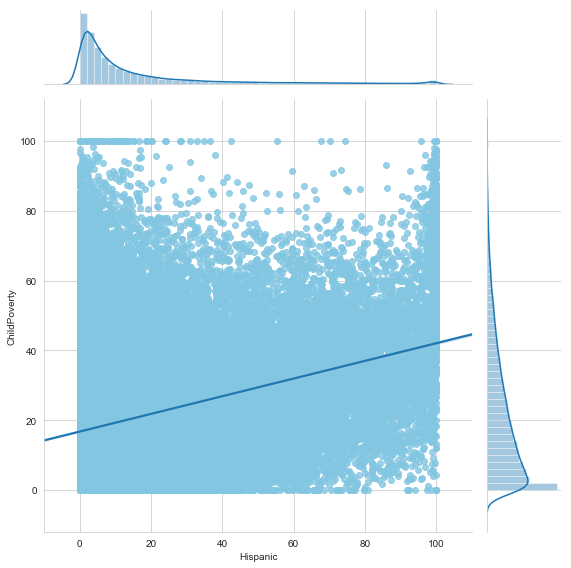

In [44]:
sns.jointplot(x='Hispanic', y='ChildPoverty', data=df_17_cln, kind='reg', scatter_kws={'color':'c'}, size=8);

As can be seen from the above scatterplots, the Child Poverty rate and the ethnic/racial group percentage shows a strong correlation. As with unemployment, there are clear patterns in the data indicating that the child poverty rate is correlated either in a positive or negative direction depending on the ethnic/racial breakdown of a particular community. Again, white population increase is associated with a decrease in child poverty, while black and Hispanic population increases show trends of increased child poverty.

Because these racial relationships are so strong, we expect that the race percentage features will be highly significant in predicting our target variables of unemployment and child poverty. Also, these findings would certainly be relevant to anyone aiming to aid unemployment or child poverty rates, as the racial disparities are so pronounced.

### New Features

<div class="alert alert-block alert-info">
<b>Rubric 8:</b> Are there other features that could be added to the data or created from existing features? Which ones?
</div>

After examining exploratory plots and relationships between variables, it is apparent that there are potential underlying factors or variables that drive the levels of Unemployment and Child Poverty rate. There is an opportunity to examine the economic differences between Men and Women, and their respective employment positions, i.e. Professional, Office, Service, Construction, Production, and Public Work or Private Work. We will now perform a principal component analysis, aiming to perform dimension reduction as well as find a relationship between the different demographic and/or racial groups and their respective professional groups.

Besides PCA as a technique to create "new" features from existing variables, there are several additional features we could add or create. As we have done below, converting the Men and Women variables into percentages of the total population may be helpful to keep the measurements across census tracts consistent. This could also be done for the count variables of VotingAgeCitizen and Employed. It may also be helpful to divide up the states into their geographical regions such as the South, Midwest, etc, so that the predictive model does not have to create encodings for all of the states. In addition, if data is available it would be useful for us to add in a feature for the child population of the census tracts, so we could take child percentages into account when considering child poverty rates. We now continue with PCA.

#### Create New Features:

In [48]:
#New features for PCA analysis
df_17_cln['Men_perc'] = df_17_cln['Men'] / (df_17_cln['Men'] + df_17_cln['Women'])
df_17_cln['Women_perc'] = df_17_cln['Women'] / (df_17_cln['Men'] + df_17_cln['Women'])
df_17_cln['Employed_thousands'] = df_17_cln['Employed'] / 1000
df_17_cln['Income_thousands'] = df_17_cln['Income'] / 1000

We have created the above new features to create a meaningful subset of features to perform a PCA. Now let's rebuild the dataframe with new features.

#### Rebuild the dataframe with new features:

In [49]:
# create a subset of plottable features:
features_plot = ['Women_perc', 
                 'Income_thousands', 
                 'Professional', 
                 'Service', 
                 'Office', 
                 'Construction', 
                 'Production', 
                 'Drive', 
                 'Carpool', 
                 'Transit', 
                 'Walk', 
                 'OtherTransp', 
                 'WorkAtHome', 
                 'MeanCommute', 
                 'Employed_thousands', 
                 'PrivateWork', 
                 'PublicWork', 
                 'SelfEmployed', 
                 'FamilyWork']

cluster_plot_df = df_17_cln[features_plot]

In [50]:
cluster_plot_df.head()

,Women_perc,Income_thousands,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed_thousands,PrivateWork,PublicWork,SelfEmployed,FamilyWork
TractId,,,,,,,,,,,,,,,,,,,
1001020100,0.512737,67.826,38.5,15.6,22.8,10.8,12.4,94.2,3.3,0.0,0.5,0.0,2.1,24.5,0.881,74.2,21.2,4.5,0.0
1001020200,0.462707,41.287,30.5,24.9,22.9,6.3,15.4,90.5,9.1,0.0,0.0,0.5,0.0,22.2,0.852,75.9,15.0,9.0,0.0
1001020300,0.547120,46.806,27.9,19.4,33.3,9.9,9.6,88.3,8.4,0.0,1.0,0.8,1.5,23.1,1.482,73.3,21.1,4.8,0.7
1001020400,0.531052,55.895,29.0,16.6,25.8,9.1,19.5,82.3,11.2,0.0,1.5,2.9,2.1,25.9,1.849,75.8,19.7,4.5,0.0
1001020500,0.492825,68.143,48.8,13.8,20.5,3.5,13.4,86.9,11.2,0.0,0.8,0.3,0.7,21.0,4.787,71.4,24.1,4.5,0.0


In [51]:
cluster_plot_df.columns

Index(['Women_perc', 'Income_thousands', 'Professional', 'Service', 'Office',
       'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk',
       'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed_thousands',
       'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork'],
      dtype='object')

Principal component analysis is a fast and flexible unsupervised method for dimensionality reduction in data. It is a statistical technique to convert high dimensional data to low dimensional data by selecting the most important features that capture maximum information about the dataset. The features are selected on the basis of variance that they cause in the output. The feature that causes highest variance is the first principal component. The feature that is responsible for second highest variance is considered the second principal component, and so on. Now let's implement PCA with the help of Python's Scikit-Learn library. 

In [53]:
# Codeset modified from Iris 
#- PCA transform components
from sklearn.decomposition import PCA

X = cluster_plot_df

pca = PCA(n_components=19)
pca.fit(X) # fit data and then transform it
X_pca = pca.transform(X)

# print the components

print ('pca:', pca.components_)

pca: [[-4.26073733e-05  8.98775019e-01  3.71876179e-01 -1.52146277e-01
  -1.84936422e-02 -7.04677994e-02 -1.30764824e-01  1.56289564e-02
  -5.05122360e-02  8.04710697e-03 -1.68119070e-02 -5.48887284e-03
   4.91218707e-02  4.74288691e-02  1.03413011e-02 -1.63722040e-02
   5.58524874e-03  1.06765029e-02  1.11410511e-04]
 [ 6.49956465e-05 -2.55156292e-02  7.20349406e-02  1.07240504e-01
  -4.08994218e-02 -6.25350751e-02 -7.58348123e-02 -7.76921840e-01
  -1.59054927e-04  5.67609991e-01  1.45965197e-01  4.13267501e-02
   2.21719474e-02  1.46057339e-01 -4.14722067e-03  1.66247560e-02
  -1.97936123e-02  3.57657187e-03 -3.97824232e-04]
 [ 1.35268614e-04 -3.20465123e-01  5.81169945e-01 -1.16110240e-01
  -5.61839709e-02 -1.29909809e-01 -2.78933056e-01 -2.05925191e-03
  -1.03034074e-01 -8.37697388e-02  1.07519157e-01  2.16024899e-02
   5.97198306e-02 -1.75375720e-01 -9.26937068e-03 -4.64449438e-01
   4.06512733e-01  5.64205783e-02  1.51447991e-03]
 [-4.54116202e-04  2.26009540e-01 -4.54262864e-01 

These are all the principal components of our dataset. Now let's find out how much variance does each principal component contributes.

In [54]:
#Finding variance by each component addition
for dimension in range(X_pca.shape[1]):
    variance = pca.explained_variance_ratio_[:dimension].sum() * 100.0
    print("PCA with %d components retains: %.3f of variance" % (dimension,variance))

PCA with 0 components retains: 0.000 of variance
PCA with 1 components retains: 57.077 of variance
PCA with 2 components retains: 75.249 of variance
PCA with 3 components retains: 82.247 of variance
PCA with 4 components retains: 87.084 of variance
PCA with 5 components retains: 89.999 of variance
PCA with 6 components retains: 92.358 of variance
PCA with 7 components retains: 94.163 of variance
PCA with 8 components retains: 95.897 of variance
PCA with 9 components retains: 97.138 of variance
PCA with 10 components retains: 98.186 of variance
PCA with 11 components retains: 99.153 of variance
PCA with 12 components retains: 99.623 of variance
PCA with 13 components retains: 99.931 of variance
PCA with 14 components retains: 99.986 of variance
PCA with 15 components retains: 100.000 of variance
PCA with 16 components retains: 100.000 of variance
PCA with 17 components retains: 100.000 of variance
PCA with 18 components retains: 100.000 of variance


From the output above, just two components contribute to 75% of the variance.

In [55]:
#Identifying number of PCA components for optimal preddiction
k = 0
total_variance = pca.explained_variance_.sum()
var_till_now = 0;

while (var_till_now/total_variance) < 0.99 :
    var_till_now += pca.explained_variance_[k]
    k = k + 1
    
print("Keeping variance = 99% of total variance , dimensions needed :",k)

k = 0;
var_till_now = 0;

while (var_till_now/total_variance) < 0.93 :
    var_till_now += pca.explained_variance_[k]
    k = k + 1
    
print("Keeping variance = 93% of total variance , dimensions needed :",k)

Keeping variance = 99% of total variance , dimensions needed : 11
Keeping variance = 93% of total variance , dimensions needed : 7


If we want to retain 93% of total variance we will need about 6 or 7 components. But let's also use a scree plot to verify the principal components to keep. An ideal curve should be steep, then bends at an “elbow” — this is the cutting-off point — and after that flattens out. 

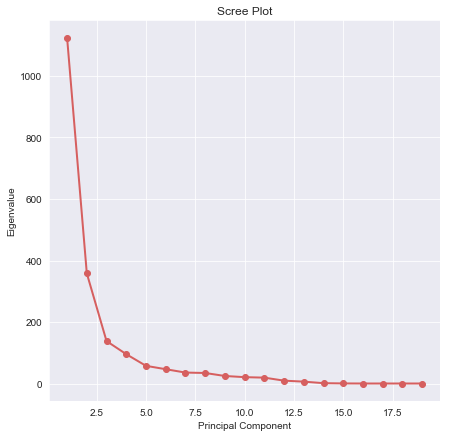

In [56]:
#Draw a scree plot
#Reference: https://stats.stackexchange.com/questions/12819/how-to-draw-a-scree-plot-in-python
sns.set_style("darkgrid")
fig = plt.figure(figsize=(7,7))
var = pca.explained_variance_
num = [i+1 for i in range(len(var))]

plt.plot(num, var, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

plt.show()

From the Scree plot above, about 6 or 7 is the cutting-off point and the curve flattens out. For our analysis, we decided to keep 6 components that explains 92% of the total variance.  

In [57]:
#Match the labels of components
pc = pca.components_[:10]
pc = pd.DataFrame(pc)
pc.columns = cluster_plot_df.columns.values
pc.head()

,Women_perc,Income_thousands,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed_thousands,PrivateWork,PublicWork,SelfEmployed,FamilyWork
0,-0.000043,0.898775,0.371876,-0.152146,-0.018494,-0.070468,-0.130765,0.015629,-0.050512,0.008047,-0.016812,-0.005489,0.049122,0.047429,0.010341,-0.016372,0.005585,0.010677,0.000111
1,0.000065,-0.025516,0.072035,0.107241,-0.040899,-0.062535,-0.075835,-0.776922,-0.000159,0.567610,0.145965,0.041327,0.022172,0.146057,-0.004147,0.016625,-0.019794,0.003577,-0.000398
2,0.000135,-0.320465,0.581170,-0.116110,-0.056184,-0.129910,-0.278933,-0.002059,-0.103034,-0.083770,0.107519,0.021602,0.059720,-0.175376,-0.009269,-0.464449,0.406513,0.056421,0.001514
3,-0.000454,0.226010,-0.454263,0.182140,-0.033756,0.225580,0.080287,-0.014751,0.097458,0.047511,-0.089670,-0.017009,-0.023580,0.223452,-0.006826,-0.577045,0.489931,0.084022,0.003096
4,-0.001158,0.131315,-0.099585,0.108508,-0.239021,0.138994,0.091080,-0.378228,0.290850,-0.478869,0.338801,0.094293,0.133154,-0.511535,-0.010876,-0.037479,-0.068018,0.100514,0.004953


We have matched the labels to the components. To investigate which predictor variables contribute most to the first 10 principal components, we list the ones that contribute over 20% below:

In [58]:
for i in range(len(pc)):
    pc1 = pc.iloc[i]
    print('component {}:\n {}\n'.format(i+1,pc1[abs(pc1)>=0.2]))

component 1:
 Income_thousands    0.898775
Professional        0.371876
Name: 0, dtype: float64

component 2:
 Drive     -0.776922
Transit    0.567610
Name: 1, dtype: float64

component 3:
 Income_thousands   -0.320465
Professional        0.581170
Production         -0.278933
PrivateWork        -0.464449
PublicWork          0.406513
Name: 2, dtype: float64

component 4:
 Income_thousands    0.226010
Professional       -0.454263
Construction        0.225580
MeanCommute         0.223452
PrivateWork        -0.577045
PublicWork          0.489931
Name: 3, dtype: float64

component 5:
 Office        -0.239021
Drive         -0.378228
Carpool        0.290850
Transit       -0.478869
Walk           0.338801
MeanCommute   -0.511535
Name: 4, dtype: float64

component 6:
 Service         0.612513
Office          0.376053
Construction   -0.333503
Production     -0.478633
MeanCommute    -0.226274
Name: 5, dtype: float64

component 7:
 Service      -0.486208
Office        0.708489
Production   -0.2514

Each of the principal components above have multiple predictor variables, and only a few of them have one or two dominant variables, while most of them consist of equally important variables.

To further make it clearer that which predictor variables act a major role in estabishing the principal components, we apply the varimax rotation, which push each contribution of predictor variables to either 1/-1 or 0 without damaging the structure of the principal components.

#### Varimax Rotation:

In [59]:
## see https://en.wikipedia.org/wiki/Talk:Varimax_rotation
from scipy import eye, asarray, dot, sum
from scipy.linalg import svd
def varimax(Phi, gamma = 1.0, q = 20, tol = 1e-6):
    #reference: https://en.wikipedia.org/wiki/Talk:Varimax_rotation
    p,k = Phi.shape
    R = eye(k)
    d=0
    for i in range(q):
        d_old = d
        Lambda = dot(Phi, R)
        u,s,vh = svd(dot(Phi.T,asarray(Lambda)**3 - (gamma/p) * dot(Lambda, np.diag(np.diag(dot(Lambda.T,Lambda))))))
        R = dot(u,vh)
        d = sum(s)
        if d_old!=0 and d/d_old < 1 + tol: break
    return dot(Phi, R)

In [60]:
pc_r = varimax(pca.components_)
pc_r = pd.DataFrame(pc_r)
pc_r.columns = cluster_plot_df.columns.values

In [61]:
for i in range(10):
    pc1_r = pc_r.iloc[i]
    print('component {}:\n {}\n'.format(i+1,pc1_r[abs(pc1_r)>=0.2]))

component 1:
 Income_thousands    1.0
Name: 0, dtype: float64

component 2:
 Drive   -1.0
Name: 1, dtype: float64

component 3:
 Professional    1.0
Name: 2, dtype: float64

component 4:
 PrivateWork   -1.0
Name: 3, dtype: float64

component 5:
 MeanCommute   -1.0
Name: 4, dtype: float64

component 6:
 Service    1.0
Name: 5, dtype: float64

component 7:
 Office    1.0
Name: 6, dtype: float64

component 8:
 Production   -1.0
Name: 7, dtype: float64

component 9:
 Carpool    1.0
Name: 8, dtype: float64

component 10:
 Construction   -1.0
Name: 9, dtype: float64



From the above output we see that Income in thousands, Drive, Professional, Private Work, Mean Commute and Service are the predictor variables that act as a major role in estabishing the principal components. As a next step we will use these components to tune our models in KNN, Random Forest, Logistic Regression, etc to predict the Unemployment and Child poverty.

### Exceptional Work

<div class="alert alert-block alert-info">
<b>Rubric 9:</b> You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results.
</div>

We spent a lot of time on this project! We did our best to provide careful analysis of our dataset. This dataset was tricky to deal with because of the mix of count (men, women, etc.) and percentage (hispanic, white, etc.) variables. In addition, the large number of variables (37) was a lot to process as well. Our primary extra work was performing both PCA (above) and LDA (below) as dimension reduction techniques, which was not required. 

#### LDA Analysis

Linear Discriminant Analysis (LDA) for unemployment would identify the attributes showing the most variance between classes. LDA is a supervised learning technique using class labels. We can first separate the unemployment in the U.S. territories into categories.

In [66]:
# Classifying the Unemp based on the distribution for prediction
df_17_cln['Unemp'] = pd.cut(df_17_cln.Unemployment,[-1,6,12,16,101],labels=['low','med','high','very_high'])
print (df_17_cln.Unemp.value_counts())

low          36986
med          26384
high          5196
very_high     4323
Name: Unemp, dtype: int64


In [68]:
#Computing dimensional mean vectors
#ref: https://www.apsl.net/blog/2017/07/18/using-linear-discriminant-analysis-lda-data-explore-step-step/

np.set_printoptions(precision=6)# Here we used the Ratios on several variables for LDA analysis

#Ratio of Income Error to Income
df_17_cln['IncErrRatio'] = df_17_cln['IncomeErr'] / df_17_cln['Income']
#Ratio of Income percapita error to Income percapita
df_17_cln['IncPCErrRatio'] = df_17_cln['IncomePerCapErr'] / df_17_cln['IncomePerCap']
#Ratio of Voting Age citizens to total population
df_17_cln['VotingAgeR'] = df_17_cln['VotingAgeCitizen']/df_17_cln['TotalPop']
# Ratio of Employed to total population
df_17_cln['EmpRatio'] = df_17_cln['Employed']/df_17_cln['TotalPop']
# Ratio of Individual race on total population


x = df_17_cln[[ 'EmpRatio','VotingAgeR','Professional','MeanCommute']].values
y = df_17_cln['Unemp'].values

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1

label_dict = {1: 'low', 2: 'med', 3: 'high', 4: 'very_high'}
# Mean vectors for each class obtained on LDA
print ("The dimensional mean vectors are as below for each class:")
mean_vec = []
for cl in range(1,5):
    mean_vec.append(np.mean(x[y==cl], axis=0))
    print('Mean Vector class %s: %s\n' %(cl, mean_vec[cl-1]))

The dimensional mean vectors are as below for each class:
Mean Vector class 1: [ 0.389611  0.685906 24.66353  26.45077 ]

Mean Vector class 2: [ 0.500901  0.731536 41.316636 25.676697]

Mean Vector class 3: [ 0.451559  0.7066   31.904757 26.480086]

Mean Vector class 4: [ 0.321463  0.699148 21.815059 26.625931]



Within class and Between class scatter matrix is created in the following code.

In [69]:
#Within class scatter matrix creation
S_W = np.zeros((4,4))
for cl,mv in zip(range(1,4), mean_vec):
    class_sc_mat = np.zeros((4,4))                  # scatter matrix for every class
    for row in x[y == cl]:
        row, mv = row.reshape(4,1), mv.reshape(4,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # sum class scatter matrices
print('within-class Scatter Matrix:\n', S_W)

within-class Scatter Matrix:
 [[ 4.033443e+02  2.385809e+01  2.366121e+04  1.438460e+03]
 [ 2.385809e+01  7.230251e+02  2.568869e+04 -9.043151e+03]
 [ 2.366121e+04  2.568869e+04  1.317538e+07  6.738418e+05]
 [ 1.438460e+03 -9.043151e+03  6.738418e+05  3.366723e+06]]


In [70]:
#Between class scatter matrix creation
all_mean = np.mean(x, axis=0)

S_B = np.zeros((4,4))
for i,mean_vec in enumerate(mean_vec):  
    n = x[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(4,1) # make column vector
    all_mean = all_mean.reshape(4,1) # make column vector
    S_B += n * (mean_vec - all_mean).dot((mean_vec - all_mean).T)

print('between-class Scatter Matrix:\n', S_B)

between-class Scatter Matrix:
 [[ 1.710144e+02  4.626093e+01  2.173763e+04 -1.161437e+03]
 [ 4.626093e+01  1.706225e+01  6.919092e+03 -4.286245e+02]
 [ 2.173763e+04  6.919092e+03  3.011836e+06 -1.778843e+05]
 [-1.161437e+03 -4.286245e+02 -1.778843e+05  1.224182e+04]]



Calculating the generalized values of LDA and print the Eigen vectors and validating them.

In [71]:
#The generalized values of linear discriminants are printed
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(4,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))


Eigenvector 1: 
[[ 0.999703]
 [ 0.024128]
 [ 0.002912]
 [-0.001951]]
Eigenvalue 1: 5.06e-01

Eigenvector 2: 
[[-0.971718]
 [ 0.236023]
 [ 0.006743]
 [-0.003404]]
Eigenvalue 2: 2.04e-02

Eigenvector 3: 
[[ 0.152298]
 [ 0.988255]
 [-0.002647]
 [ 0.012232]]
Eigenvalue 3: 6.53e-04

Eigenvector 4: 
[[-0.381816]
 [-0.924076]
 [ 0.005841]
 [ 0.016299]]
Eigenvalue 4: 7.95e-18


In [72]:
#validating the Eigen vector's values calculations have no errors
for i in range(len(eig_vals)):
    eigv = eig_vecs[:,i].reshape(4,1)
    np.testing.assert_array_almost_equal(np.linalg.inv(S_W).dot(S_B).dot(eigv),
                                         eig_vals[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)
print("Validated")

Validated


The Eigen vectors and eigen values provide us with distortion of the linear transformation. The eigenvector shows the direction and the eigenvalues show the magnitude of distortion.

In [73]:
# Make a list of (eigenvalue, eigenvector) values and sorted
eig_pair = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pair = sorted(eig_pair, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pair:
    print(i[0])

Eigenvalues in decreasing order:

0.5057463267153132
0.020447296035762893
0.0006534611129458491
7.950247371510214e-18


Printing the eigen values for the eigen vectors in decreasing order.

In [74]:
#Printing variance in percentage 
print('Variance percentage explained:\n')
ev_sum = sum(eig_vals)
for i,j in enumerate(eig_pair):
    print('eigen_value {0:}: {1:.2%}'.format(i+1, (j[0]/ev_sum).real))

Variance percentage explained:

eigen_value 1: 95.99%
eigen_value 2: 3.88%
eigen_value 3: 0.12%
eigen_value 4: 0.00%


The first eigenvector has the most information (96%) and so we would not lose much if we create a one dimension feature based on the values printed in decreasing order.

In [75]:
#Choose largest eigenvalues
W = np.hstack((eig_pair[0][1].reshape(4,1), eig_pair[1][1].reshape(4,1)))
print('Matrix W:\n', W.real)

#Transforming the sample to new space
X_lda = x.dot(W)


Matrix W:
 [[ 0.999703 -0.971718]
 [ 0.024128  0.236023]
 [ 0.002912  0.006743]
 [-0.001951 -0.003404]]


Here we visualize the scatter plot.

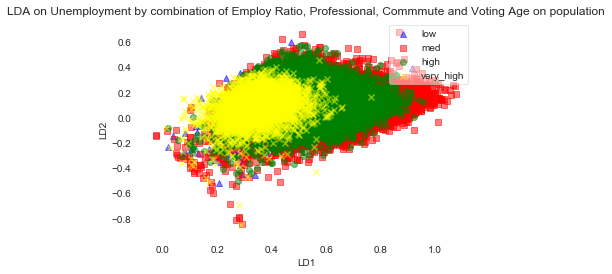

In [76]:
#LDA using Scikit learn - Code is modified from www.apsl.net blog
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
sklearn_lda = LDA(n_components=2)
X_lda_sklearn = sklearn_lda.fit_transform(x, y)

def plot_scikit_lda(X, title):

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,5),('^', 's', 'o', 'x'),('blue', 'red', 'green', 'yellow')):

        plt.scatter(x=X_lda[:,0][y == label],
                    y=X_lda[:,1][y == label] * -1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)
    
    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

sns.set_style("whitegrid")
plot_scikit_lda(X_lda_sklearn, title='LDA on Unemployment by combination of Employ Ratio, Professional, Commmute and Voting Age on population')


Here we see the plot in 2D. If we visualize the plot in a plane we could separate the groups in its own sets. LD1 and LD2 provide enough dimensionality reduction and could prove to be good in predicting Unemployment.

### References

- https://www.kaggle.com/pstetz/comprehensive-look-at-the-2015-acs-estimate
- https://www.bls.gov/opub/ted/2017/unemployment-rate-held-at-4-point-1-percent-in-november-2017.htm?view_full
- https://github.com/yuydu/data-project/blob/ce5af4a7c54bfe72279e8bf7b565434aa470ee22/Loan%20Status%20Analysis/PCA%2C%20KNN%20and%20Random%20Forest%20Clsifier.ipynb
- https://www.kaggle.com/bigironsphere/tutorial-maps-eda-and-models-with-nyc-census-data/notebook
- https://www.ibm.com/support/knowledgecenter/en/SSGNPV_1.1.3/dsx/markd-jupyter.html
- https://seaborn.pydata.org/tutorial.html
- https://nbviewer.jupyter.org/github/tejten/MachineLearningNotebooks/blob/master/04.%20Dimension%20Reduction%20and%20Images.ipynb
- https://www.kaggle.com/pstetz/comprehensive-look-at-the-2015-acs-estimate#%5E-General
- https://www.apsl.net/blog/2017/07/18/using-linear-discriminant-analysis-lda-data-explore-step
- https://www.statista.com/statistics/737923/us-population-by-gender/
